# Detect Counts: Low-frequency Nanoflares

In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import h5py
import astropy.units as u
import sunpy.map
from astropy.coordinates import SkyCoord
import distributed

import synthesizAR
from synthesizAR.instruments import InstrumentSDOAIA
from synthesizAR.atomic import EmissionModel
from synthesizAR.maps import make_los_velocity_map, make_temperature_map

%matplotlib inline

In [2]:
client = distributed.Client()
client

Client Scheduler: tcp://127.0.0.1:35490 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 64 Cores: 64 Memory: 270.38 GB


In [3]:
field = synthesizAR.Field.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/field_checkpoint/')

In [4]:
em_model = EmissionModel.restore('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/nei/emission_model.json')

In [5]:
aia = InstrumentSDOAIA([0, 30000]*u.s)
observer = synthesizAR.Observer(field, [aia], parallel=True)

In [6]:
observer.build_detector_files('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/nei/',
                              ds=0.5*u.Mm)

/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))
/storage-home/w/wtb2/anaconda3/envs/synthesizar/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:299: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable cause: s too small. (abs(fp-s)/s>0.001)
  warnings.warn(RuntimeWarning(_iermess[ier][0]))


In [ ]:
futures = observer.flatten_detector_counts(emission_model=em_model)

In [7]:
bin_futures = observer.bin_detector_counts('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/nei/')

In [ ]:
failures = []
for k in bin_futures['SDO_AIA']:
    for i,f in enumerate(bin_futures['SDO_AIA'][k]):
        if f.status != 'finished':
            print(i,k)
            print(f.exception())
            failures.append((i,k))

In [ ]:
failures[0]

In [ ]:
bin_futures['SDO_AIA']['94'][57].exception()

## Viz Sandbox

In [ ]:
#aia.observer_coordinate = SkyCoord(lat=field.magnetogram.observer_coordinate.lat,
#                                   lon=field.magnetogram.center.transform_to('heliographic_stonyhurst').lon - 75*u.deg,
#                                   radius=field.magnetogram.observer_coordinate.radius,
#                                   frame='heliographic_stonyhurst')
aia.observer_coordinate = field.magnetogram.observer_coordinate
#m = make_los_velocity_map(1000 * u.s, field, aia)

In [ ]:
m = make_temperature_map(15000 * u.s, field, aia)

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection=m)
im = m.plot(axes=ax,
            norm=matplotlib.colors.SymLogNorm(10, vmin=1e4, vmax=2e7)
           )
m.draw_grid(axes=ax,color='w',grid_spacing=10 * u.deg)
fig.colorbar(im)

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection=m)
im = m.plot(axes=ax,
            norm=matplotlib.colors.SymLogNorm(10, vmin=1e4, vmax=2e7)
           )
m.draw_grid(axes=ax,color='w',grid_spacing=10 * u.deg)
fig.colorbar(im)

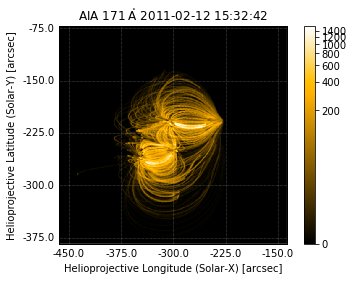

In [9]:
fig = plt.figure()
m = sunpy.map.Map('/storage-home/w/wtb2/data/timelag_synthesis_v2/low_frequency/nei/SDO_AIA/171/map_t002000.fits')
ax = fig.gca(projection=m)
im = m.plot(axes=ax,
       #norm=matplotlib.colors.SymLogNorm(1e-10,vmin=1e-8,vmax=1e3)
      )
fig.colorbar(im)

In [ ]:
plt.imshow(m.data)
plt.colorbar()

In [ ]:
bins,bin_range = aia.make_detector_array(field)

In [ ]:
bins.z

In [ ]:
bin_range.z

In [ ]:
dz = np.diff(bin_range.z)[0].cgs / bins.z * (1. * u.pixel)

In [ ]:
dz

In [ ]:
dz.cgs